In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
#load love letters
folder_path = 'love_letters'
file_list = os.listdir(folder_path)
letters = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r', encoding='utf8') as f:
        letter = f.read()
        letters.append(letter)

print(len(letters))

88


In [3]:
letters[0]

'My Dearest Friend,\n…should I draw you the picture of my heart it would be what I hope you would still love though it contained nothing new.\xa0 The early \npossession you obtained there, and the absolute power you have obtained over it, leaves not the smallest space unoccupied.\nI look back to the early days of our acquaintance and friendship as to the days of love and innocence, and, with an indescribable \npleasure, I have seen near a score of years roll over our heads with an affection heightened and improved by time, nor have the dreary \nyears of absence in the smallest degree effaced from my mind the image of the dear untitled man to whom I gave my heart.'

In [4]:
import re
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')  #for tokenization
nltk.download('averaged_perceptron_tagger')  #for part-of-speech tagging
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김성연\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\김성연\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\김성연\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z ]", " ", text) #구두점 제거
    words = word_tokenize(text) #단어 단위로 tokenization
    tagged_words = pos_tag(words) #각 단어들에 품사 tagging
    
    result_words = []
    
    lemmatizer = WordNetLemmatizer()
    
    for word, pos in tagged_words:
        if pos.startswith('V'):
            lemma = lemmatizer.lemmatize(word, pos='v')
            result_words.append(lemma)
        elif pos.startswith('J'):
            lemma = lemmatizer.lemmatize(word, pos='a')
            result_words.append(lemma)
        elif pos is "NN" or pos is "NNS":
            lemma = lemmatizer.lemmatize(word, pos='n')
            result_words.append(lemma)
        elif pos.startswith('R'):
            lemma = lemmatizer.lemmatize(word, pos='r')
            result_words.append(lemma)
    
    result_words = [word.lower() for word in result_words]
    result_words = [word for word in result_words if word not in stop_words]
    
    dict = {
        'word' : result_words
    }
    
    data_frame = pd.DataFrame(dict)
    
    return data_frame

In [7]:
love_letters = ' '.join(letters)
love_letters

"My Dearest Friend,\n…should I draw you the picture of my heart it would be what I hope you would still love though it contained nothing new.\xa0 The early \npossession you obtained there, and the absolute power you have obtained over it, leaves not the smallest space unoccupied.\nI look back to the early days of our acquaintance and friendship as to the days of love and innocence, and, with an indescribable \npleasure, I have seen near a score of years roll over our heads with an affection heightened and improved by time, nor have the dreary \nyears of absence in the smallest degree effaced from my mind the image of the dear untitled man to whom I gave my heart. My very dear Sarah:\nThe indications are very strong that we shall move in a few days — perhaps tomorrow. Lest I should not be able to write you again, \nI feel impelled to write lines that may fall under your eye when I shall be no more.\nOur movement may be one of a few days duration and full of pleasure — and it may be one 

In [8]:
love_words = preprocess_text(love_letters) #동사, 형용사 추출
love_words  

word
0     dearest
1        draw
2        hope
3       still
4        love
...       ...
4011    think
4012     even
4013    touch
4014     full
4015     come

[4016 rows x 1 columns]

In [9]:
from nltk import FreqDist

In [10]:
love_words_freq = FreqDist(love_words['word'])
len(love_words_freq)

1329

In [11]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [ ]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename='glove.6B.zip')
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()

In [12]:
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding='utf8')

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr

f.close()

In [13]:
len(embedding_dict)

400000

In [14]:
len(embedding_dict['the']) #embedding vector들 길이 전부 100

100

In [15]:
def embedding(data_frame):
    data_frame['embedding'] = data_frame['word'].map(embedding_dict)
    data_frame.dropna(subset=['embedding'], inplace=True)
    
    return data_frame

In [16]:
embedding(love_words)

word                                          embedding
0     dearest  [0.14762, -0.30291, 0.42064, -0.45208, -0.0763...
1        draw  [-0.41904, 0.6652, 0.29695, 0.17117, 0.092566,...
2        hope  [0.034877, 0.46079, 0.068392, -0.028982, 0.165...
3       still  [-0.04248, 0.80249, 0.51451, -0.55427, -0.1379...
4        love  [0.25975, 0.55833, 0.57986, -0.21361, 0.13084,...
...       ...                                                ...
4011    think  [0.0025458, 0.81635, 0.76086, -0.56887, -0.873...
4012     even  [-0.15308, 0.63194, 0.65512, -0.30706, -0.2391...
4013    touch  [-0.31036, -0.18006, 0.80064, -0.08167, 0.0598...
4014     full  [-0.1371, 0.2788, 0.22932, -0.17301, 0.094876,...
4015     come  [-0.088345, 0.59988, 0.59225, -0.5246, 0.01337...

[3993 rows x 2 columns]

In [17]:
love_words['y'] = 1
love_words

word                                          embedding  y
0     dearest  [0.14762, -0.30291, 0.42064, -0.45208, -0.0763...  1
1        draw  [-0.41904, 0.6652, 0.29695, 0.17117, 0.092566,...  1
2        hope  [0.034877, 0.46079, 0.068392, -0.028982, 0.165...  1
3       still  [-0.04248, 0.80249, 0.51451, -0.55427, -0.1379...  1
4        love  [0.25975, 0.55833, 0.57986, -0.21361, 0.13084,...  1
...       ...                                                ... ..
4011    think  [0.0025458, 0.81635, 0.76086, -0.56887, -0.873...  1
4012     even  [-0.15308, 0.63194, 0.65512, -0.30706, -0.2391...  1
4013    touch  [-0.31036, -0.18006, 0.80064, -0.08167, 0.0598...  1
4014     full  [-0.1371, 0.2788, 0.22932, -0.17301, 0.094876,...  1
4015     come  [-0.088345, 0.59988, 0.59225, -0.5246, 0.01337...  1

[3993 rows x 3 columns]

In [18]:
news_data = pd.read_csv('bbc_news.csv')
news_data

title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
23482  Son awaits news, good or bad, on missing peace...   
23483  UK to deploy Navy ships to 'bolster security' ...   
23484  Watch: Breaking down the video of huge Hamas a...   
23485  French police break up pro-Palestinian demo af...   
23486  CCTV shows moment women escape Israeli moshav ...   

                             pubDate  \
0      Mon, 07 Mar 2022 08:01:56 GMT   
1      Sun, 06 Mar 2022 22:49:58 GMT   
2      Mon, 07 Mar 2022 00:14:42 GMT   
3      Mon, 07 Mar 2022 00:05:40 GMT   
4      Mon, 07 Mar 2022 08:15:53 GMT   
...                              ...   
23482  Fri, 13 Oct 2023 09:53:38 GMT   
23483  Fri, 13 Oct 2023 11:59:27 GMT   
23484  Thu, 12 Oct 2023 19:18:46 GMT   
23485  Fri, 13 Oct 2023 07:01:06 GMT   
23486  Thu, 12 Oct 2023 14:01:57 GMT   

                                                    guid  \
0       https://www.bbc.co.uk/news/world-europe-60638042   
1       https://www.bbc.co.uk/news/world-europe-60641873   
2           https://www.bbc.co.uk/news/business-60623941   
3                 https://www.bbc.co.uk/news/uk-60579079   
4           https://www.bbc.co.uk/news/business-60642786   
...                                                  ...   
23482  https://www.bbc.co.uk/news/world-middle-east-6...   
23483             https://www.bbc.co.uk/news/uk-67095846   
23484  https://www.bbc.co.uk/news/world-middle-east-6...   
23485   https://www.bbc.co.uk/news/world-europe-67088547   
23486  https://www.bbc.co.uk/news/world-middle-east-6...   

                                                    link  \
0      https://www.bbc.co.uk/news/world-europe-606380...   
1      https://www.bbc.co.uk/news/world-europe-606418...   
2      https://www.bbc.co.uk/news/business-60623941?a...   
3      https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4      https://www.bbc.co.uk/news/business-60642786?a...   
...                                                  ...   
23482  https://www.bbc.co.uk/news/world-middle-east-6...   
23483  https://www.bbc.co.uk/news/uk-67095846?at_medi...   
23484  https://www.bbc.co.uk/news/world-middle-east-6...   
23485  https://www.bbc.co.uk/news/world-europe-670885...   
23486  https://www.bbc.co.uk/news/world-middle-east-6...   

                                             description  
0      The Ukrainian president says the country will ...  
1      Jeremy Bowen was on the frontline in Irpin, as...  
2      One of the world's biggest fertiliser firms sa...  
3      The parents of the Manchester Arena bombing's ...  
4      Consumers are feeling the impact of higher ene...  
...                                                  ...  
23482  My mother would say the atrocities are the res...  
23483  Two ships, surveillance aircraft, helicopters ...  
23484  The BBC’s Gordon Corera investigates exactly h...  
23485  Tear gas is used after pro-Palestinian rallies...  
23486  The two women managed to run away after Israel...  

[23487 rows x 5 columns]

In [19]:
news_text = ' '.join(news_data['description'])
news_text

'The Ukrainian president says the country will not forgive or forget those who murder its civilians. Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee. One of the world\'s biggest fertiliser firms says the conflict could deliver a shock to food supplies. The parents of the Manchester Arena bombing\'s youngest victim speak about their life since she died. Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump. Boris Johnson is to meet the Canadian and Dutch PMs, as MPs debate new laws targeting oligarchs. The home secretary says she is "surging capacity" as about 1% of 5,500 applications are granted. TikTok suspends live streaming and new content from its platform, while Russians can no longer access Netflix. Five things you need to know about the coronavirus pandemic this Monday morning. People have been held in 53 cities, from St Petersburg in the west to Vladivostok in the east. More than 1.5

In [20]:
news_words = preprocess_text(news_text) #동사, 형용사 추출
news_words  

word
0      ukrainian
1            say
2        forgive
3         forget
4         murder
...          ...
85421        run
85422       away
85423    israeli
85424   military
85425     arrive

[85426 rows x 1 columns]

In [21]:
embedding(news_words)

word                                          embedding
0      ukrainian  [0.42781, 0.65036, 0.79581, 0.67565, 0.21018, ...
1            say  [-0.091682, 0.58105, 0.40477, -0.41979, -0.851...
2        forgive  [0.24482, 0.83172, 0.88298, 0.012043, -0.9974,...
3         forget  [-0.26047, 0.50586, 0.77615, -0.18883, -0.8125...
4         murder  [0.45621, -0.46858, -0.23133, -0.28282, 0.6210...
...          ...                                                ...
85421        run  [-0.083289, 0.23917, 0.07881, -0.72503, 0.5294...
85422       away  [-0.10379, -0.014792, 0.59933, -0.51316, -0.03...
85423    israeli  [-0.98425, -1.216, -0.51601, 0.70014, -0.43733...
85424   military  [-0.61705, 0.24556, -0.12763, 0.44811, -0.3133...
85425     arrive  [-0.65854, -0.14608, 0.41519, 0.091758, -0.260...

[85318 rows x 2 columns]

In [22]:
news_words['y'] = 0
news_words

word                                          embedding  y
0      ukrainian  [0.42781, 0.65036, 0.79581, 0.67565, 0.21018, ...  0
1            say  [-0.091682, 0.58105, 0.40477, -0.41979, -0.851...  0
2        forgive  [0.24482, 0.83172, 0.88298, 0.012043, -0.9974,...  0
3         forget  [-0.26047, 0.50586, 0.77615, -0.18883, -0.8125...  0
4         murder  [0.45621, -0.46858, -0.23133, -0.28282, 0.6210...  0
...          ...                                                ... ..
85421        run  [-0.083289, 0.23917, 0.07881, -0.72503, 0.5294...  0
85422       away  [-0.10379, -0.014792, 0.59933, -0.51316, -0.03...  0
85423    israeli  [-0.98425, -1.216, -0.51601, 0.70014, -0.43733...  0
85424   military  [-0.61705, 0.24556, -0.12763, 0.44811, -0.3133...  0
85425     arrive  [-0.65854, -0.14608, 0.41519, 0.091758, -0.260...  0

[85318 rows x 3 columns]

In [23]:
news_words_freq = FreqDist(news_words['word'])
len(news_words_freq)

6349

In [24]:
news_words = news_words.drop_duplicates(subset='word')
len(news_words)

6349

In [25]:
top_words = [word for word, _ in news_words_freq.most_common(4000)]
final_news_words = news_words[news_words['word'].isin(top_words)].reset_index(drop=True)
final_news_words

word                                          embedding  y
0     ukrainian  [0.42781, 0.65036, 0.79581, 0.67565, 0.21018, ...  0
1           say  [-0.091682, 0.58105, 0.40477, -0.41979, -0.851...  0
2       forgive  [0.24482, 0.83172, 0.88298, 0.012043, -0.9974,...  0
3        forget  [-0.26047, 0.50586, 0.77615, -0.18883, -0.8125...  0
4        murder  [0.45621, -0.46858, -0.23133, -0.28282, 0.6210...  0
...         ...                                                ... ..
3995      badge  [-0.1853, -0.048648, -0.15723, -0.41715, 0.158...  0
3996  irregular  [-0.10563, 0.13563, -0.2745, 0.92251, -0.78869...  0
3997    overrun  [-0.67122, -0.16433, 0.46662, 0.42567, -0.3335...  0
3998     horror  [-0.044891, 0.27732, 0.65209, -0.47268, -0.376...  0
3999     sunken  [0.090917, 0.81489, 0.53014, 0.23307, 0.50747,...  0

[4000 rows x 3 columns]

In [26]:
data = pd.concat([love_words, final_news_words], axis=0).reset_index(drop=True)
data

word                                          embedding  y
0       dearest  [0.14762, -0.30291, 0.42064, -0.45208, -0.0763...  1
1          draw  [-0.41904, 0.6652, 0.29695, 0.17117, 0.092566,...  1
2          hope  [0.034877, 0.46079, 0.068392, -0.028982, 0.165...  1
3         still  [-0.04248, 0.80249, 0.51451, -0.55427, -0.1379...  1
4          love  [0.25975, 0.55833, 0.57986, -0.21361, 0.13084,...  1
...         ...                                                ... ..
7988      badge  [-0.1853, -0.048648, -0.15723, -0.41715, 0.158...  0
7989  irregular  [-0.10563, 0.13563, -0.2745, 0.92251, -0.78869...  0
7990    overrun  [-0.67122, -0.16433, 0.46662, 0.42567, -0.3335...  0
7991     horror  [-0.044891, 0.27732, 0.65209, -0.47268, -0.376...  0
7992     sunken  [0.090917, 0.81489, 0.53014, 0.23307, 0.50747,...  0

[7993 rows x 3 columns]

In [27]:
shuffled_data = data.sample(frac=1, random_state=42)
shuffled_data

word                                          embedding  y
6329  surprising  [0.19589, 0.22512, 0.68033, 0.094158, -0.27847...  0
2576  impossible  [-0.64841, -0.25812, 0.39583, 0.43576, -0.3883...  1
5617      outfit  [-0.14608, -0.030411, 0.061688, -0.97576, -0.1...  0
1429         try  [-0.3333, -0.14814, -0.027924, -0.1579, -0.241...  1
2484       whole  [-0.17652, 0.83795, 0.3916, 0.097464, -0.39362...  1
...          ...                                                ... ..
5226      famous  [-0.045858, 0.033126, -0.18163, 0.27665, 0.410...  0
5390    external  [-1.0562, 0.070227, 0.54078, -0.048819, 0.0315...  0
860       longer  [-0.41371, 0.48438, -0.0096285, -0.081977, -0....  1
7603  formidable  [-0.44835, 0.53667, 0.29647, 0.010039, -0.1117...  0
7270   confusing  [-0.2084, -0.047161, 1.0265, -0.30166, -0.5111...  0

[7993 rows x 3 columns]

In [28]:
from keras import models
from keras import layers
import tensorflow as tf

In [120]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(100,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [30]:
x = np.array([data.tolist() for data in shuffled_data['embedding']])
y = np.array(shuffled_data['y'])

In [31]:
x_val = x[:500]
x_train = x[500:]

In [32]:
y_val = y[:500]
y_train = y[500:]

In [121]:
history = model.fit(x_train,
                   y_train,
                   epochs=15,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/15
15/15 [==============================] - 1s 12ms/step - loss: 0.6304 - accuracy: 0.6366 - val_loss: 0.5594 - val_accuracy: 0.7380
Epoch 2/15
15/15 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.7572 - val_loss: 0.5061 - val_accuracy: 0.7720
Epoch 3/15
15/15 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7766 - val_loss: 0.4835 - val_accuracy: 0.7820
Epoch 4/15
15/15 [==============================] - 0s 4ms/step - loss: 0.4595 - accuracy: 0.7853 - val_loss: 0.4734 - val_accuracy: 0.7880
Epoch 5/15
15/15 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.7899 - val_loss: 0.4677 - val_accuracy: 0.7880
Epoch 6/15
15/15 [==============================] - 0s 4ms/step - loss: 0.4377 - accuracy: 0.7951 - val_loss: 0.4643 - val_accuracy: 0.7840
Epoch 7/15
15/15 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.8026 - val_loss: 0.4615 - val_accuracy: 0.7840
Epoch 8/15
15/15 [=

In [122]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

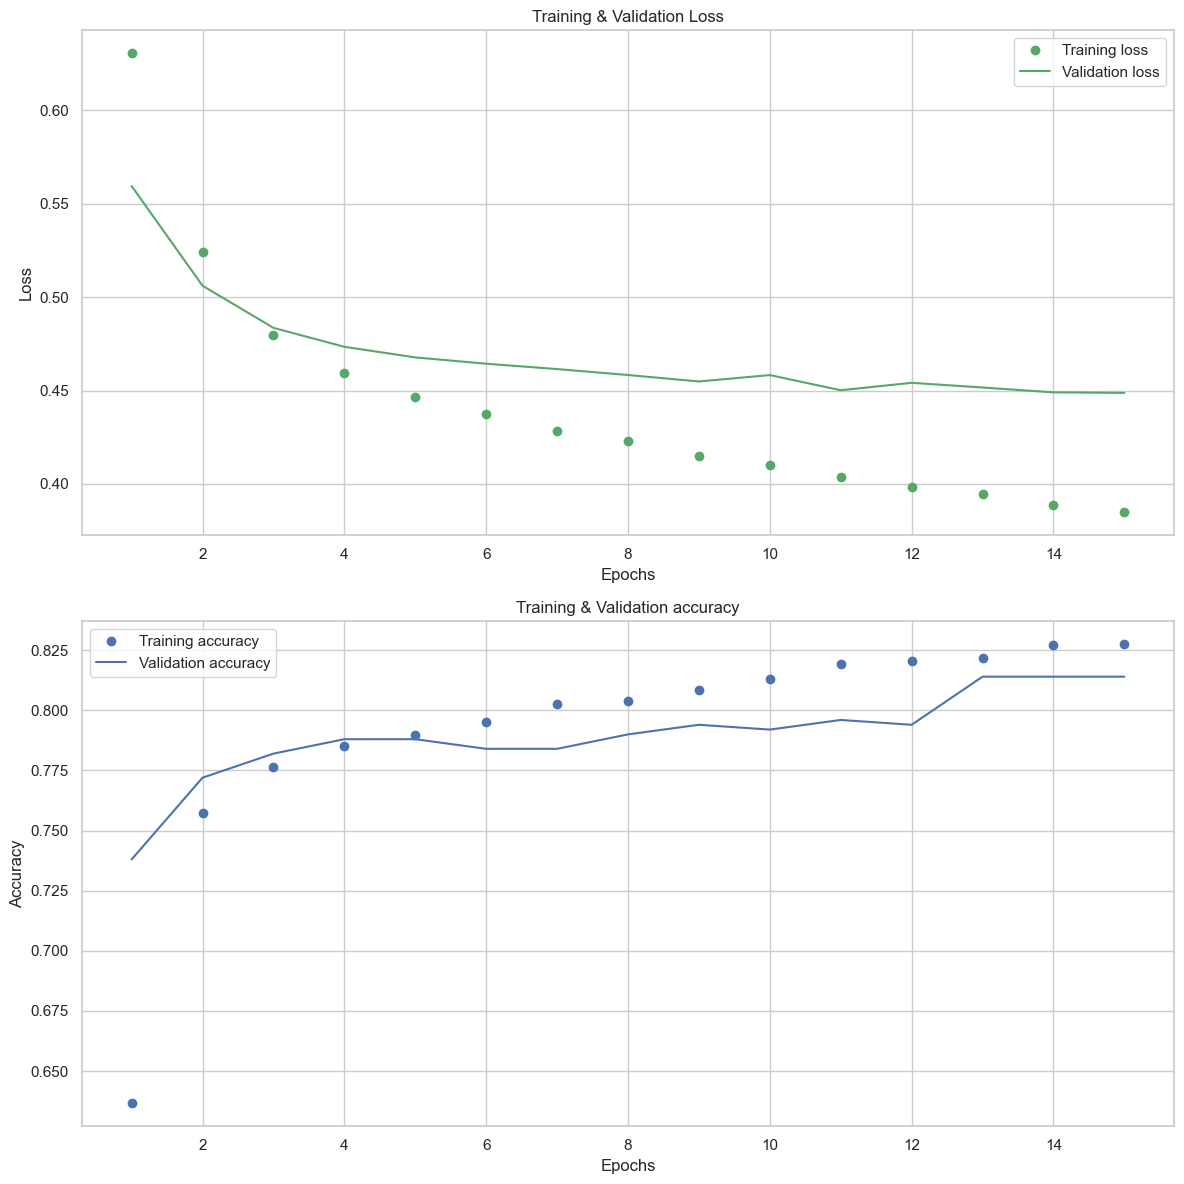

In [124]:
plt.figure(figsize=(12,12))

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [125]:
import mysql.connector

db_config = {
    'host' : 'localhost',
    'user' : 'root',
    'password' : '730203',
    'database' : 'emoji'
}

In [126]:
connection = mysql.connector.connect(**db_config)
query = """
SELECT *
FROM emoji_list
"""

In [127]:
emoji_data = pd.read_sql_query(query, connection)
emoji_data

emoji                       emoji_name
0           😀                    grinning face
1           😃      grinning face with big eyes
2           😄  grinning face with smiling eyes
3           😁   beaming face with smiling eyes
4           😆          grinning squinting face
...       ...                              ...
4728       🇿🇲                     flag: Zambia
4729       🇿🇼                   flag: Zimbabwe
4730  🏴󠁧󠁢󠁥󠁮󠁧󠁿                    flag: England
4731  🏴󠁧󠁢󠁳󠁣󠁴󠁿                   flag: Scotland
4732  🏴󠁧󠁢󠁷󠁬󠁳󠁿                      flag: Wales

[4733 rows x 2 columns]

In [128]:
emoji_names = emoji_data["emoji_name"].tolist()
emoji_names

['grinning face',
 'grinning face with big eyes',
 'grinning face with smiling eyes',
 'beaming face with smiling eyes',
 'grinning squinting face',
 'grinning face with sweat',
 'rolling on the floor laughing',
 'face with tears of joy',
 'slightly smiling face',
 'upside-down face',
 'melting face',
 'winking face',
 'smiling face with smiling eyes',
 'smiling face with halo',
 'smiling face with hearts',
 'smiling face with heart-eyes',
 'star-struck',
 'face blowing a kiss',
 'kissing face',
 'smiling face',
 'smiling face',
 'kissing face with closed eyes',
 'kissing face with smiling eyes',
 'smiling face with tear',
 'face savoring food',
 'face with tongue',
 'winking face with tongue',
 'zany face',
 'squinting face with tongue',
 'money-mouth face',
 'smiling face with open hands',
 'face with hand over mouth',
 'face with open eyes and hand over mouth',
 'face with peeking eye',
 'shushing face',
 'thinking face',
 'saluting face',
 'zipper-mouth face',
 'face with raised ey

In [129]:
preprocessed_names = []
for name in emoji_names:
    name = re.sub(r"[^a-zA-Z ]", " ", name) #구두점 제거
    words = word_tokenize(name) #단어 단위로 tokenization
    tagged_words = pos_tag(words) #각 단어들에 품사 tagging
    
    result_words = []
    
    lemmatizer = WordNetLemmatizer()
    
    for word, pos in tagged_words:
        if pos.startswith('V'):
            lemma = lemmatizer.lemmatize(word, pos='v')
            result_words.append(lemma)
        elif pos.startswith('J'):
            lemma = lemmatizer.lemmatize(word, pos='a')
            result_words.append(lemma)
        elif pos is "NN" or pos is "NNS":
            lemma = lemmatizer.lemmatize(word, pos='n')
            result_words.append(lemma)
        elif pos.startswith('R'):
            lemma = lemmatizer.lemmatize(word, pos='r')
            result_words.append(lemma)
    
    result_words = [word.lower() for word in result_words]
    result_words = [word for word in result_words if word not in stop_words]
    
    preprocessed_names.append(result_words)
preprocessed_names

[['grin'],
 ['grin', 'big'],
 ['grin', 'smile'],
 ['beam', 'smile'],
 ['grin', 'squint'],
 ['grin'],
 ['roll'],
 [],
 ['slightly', 'smile'],
 ['upside'],
 ['melt'],
 ['wink'],
 ['smile', 'smile'],
 ['smile'],
 ['smile'],
 ['smile'],
 ['strike'],
 ['blow'],
 ['kiss'],
 ['smile'],
 ['smile'],
 ['kiss', 'closed'],
 ['kiss', 'smile'],
 ['smile', 'tear'],
 ['savor'],
 [],
 ['wink'],
 [],
 ['squint'],
 [],
 ['smile', 'open'],
 [],
 ['open'],
 ['peek'],
 ['shush'],
 ['think'],
 ['salute'],
 [],
 ['raise'],
 ['neutral'],
 [],
 [],
 ['dot'],
 [],
 [],
 ['smirk'],
 ['unamused'],
 ['rolling'],
 ['grimace'],
 ['exhale'],
 ['lie'],
 ['shake'],
 ['relieve'],
 ['pensive'],
 [],
 ['drool'],
 ['sleep'],
 ['medical'],
 [],
 [],
 ['nauseated'],
 ['vomit'],
 ['sneeze'],
 ['hot'],
 ['cold'],
 ['woozy'],
 ['cross'],
 ['spiral'],
 ['explode'],
 [],
 ['party'],
 ['disguise'],
 ['smile'],
 ['nerd'],
 [],
 ['confused'],
 ['diagonal'],
 ['worried'],
 ['slightly', 'frown'],
 ['frown'],
 ['frown'],
 ['open'],
 ['h

In [130]:
emoji_data['words'] = preprocessed_names
deleted_emoji_data = emoji_data[emoji_data['words'].apply(len) > 0]
deleted_emoji_data

emoji                         emoji_name           words
0        😀                      grinning face          [grin]
1        😃        grinning face with big eyes     [grin, big]
2        😄    grinning face with smiling eyes   [grin, smile]
3        😁     beaming face with smiling eyes   [beam, smile]
4        😆            grinning squinting face  [grin, squint]
...    ...                                ...             ...
4660    🇵🇸      flag: Palestinian Territories   [palestinian]
4693    🇹🇩                         flag: Chad          [chad]
4694    🇹🇫  flag: French Southern Territories        [french]
4715    🇻🇦                 flag: Vatican City          [flag]
4718    🇻🇬       flag: British Virgin Islands       [british]

[2890 rows x 3 columns]

In [131]:
embedding_words = []
for data in deleted_emoji_data['words'].tolist():
    embedding_data = list(map(embedding_dict.get, data))
    embedding_data = [data for data in embedding_data if data is not None]
    embedding_words.append(embedding_data)
deleted_emoji_data['embedding_words'] = embedding_words
double_deleted_emoji_data = deleted_emoji_data[deleted_emoji_data['embedding_words'].apply(len) > 0]
double_deleted_emoji_data

emoji                         emoji_name           words  \
0        😀                      grinning face          [grin]   
1        😃        grinning face with big eyes     [grin, big]   
2        😄    grinning face with smiling eyes   [grin, smile]   
3        😁     beaming face with smiling eyes   [beam, smile]   
4        😆            grinning squinting face  [grin, squint]   
...    ...                                ...             ...   
4660    🇵🇸      flag: Palestinian Territories   [palestinian]   
4693    🇹🇩                         flag: Chad          [chad]   
4694    🇹🇫  flag: French Southern Territories        [french]   
4715    🇻🇦                 flag: Vatican City          [flag]   
4718    🇻🇬       flag: British Virgin Islands       [british]   

                                        embedding_words  
0     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...  
1     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...  
2     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...  
3     [[0.34988, 0.32488, -0.67332, -0.60413, 0.2886...  
4     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...  
...                                                 ...  
4660  [[-0.59119, -0.99984, -0.62092, 0.48828, 0.276...  
4693  [[-0.34242, 0.72633, 0.14171, -0.7122, 0.10799...  
4694  [[0.027048, -0.053833, 0.16562, 0.94747, 0.053...  
4715  [[-0.25484, 0.058547, -0.27894, -0.7888, 0.098...  
4718  [[-0.43094, -0.15352, 0.56281, 0.26401, -0.002...  

[2872 rows x 4 columns]

In [132]:
def calculate_love_score(array):
    x = np.array([data.tolist() for data in array])
    love_scores = model.predict(x)
    return love_scores.mean()

In [133]:
double_deleted_emoji_data['love_score'] = double_deleted_emoji_data['embedding_words'].apply(calculate_love_score)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


In [134]:
double_deleted_emoji_data['love_score'] = double_deleted_emoji_data['love_score']*100

In [135]:
double_deleted_emoji_data['love_score'] = double_deleted_emoji_data['love_score'].astype(float).round(2)

In [136]:
double_deleted_emoji_data.reset_index(drop=True, inplace=True)

In [137]:
double_deleted_emoji_data

emoji                         emoji_name           words  \
0        😀                      grinning face          [grin]   
1        😃        grinning face with big eyes     [grin, big]   
2        😄    grinning face with smiling eyes   [grin, smile]   
3        😁     beaming face with smiling eyes   [beam, smile]   
4        😆            grinning squinting face  [grin, squint]   
...    ...                                ...             ...   
2867    🇵🇸      flag: Palestinian Territories   [palestinian]   
2868    🇹🇩                         flag: Chad          [chad]   
2869    🇹🇫  flag: French Southern Territories        [french]   
2870    🇻🇦                 flag: Vatican City          [flag]   
2871    🇻🇬       flag: British Virgin Islands       [british]   

                                        embedding_words  love_score  
0     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...       68.73  
1     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...       80.80  
2     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...       74.35  
3     [[0.34988, 0.32488, -0.67332, -0.60413, 0.2886...       49.17  
4     [[0.60991, -0.059382, 0.7427, -0.29137, -0.127...       76.07  
...                                                 ...         ...  
2867  [[-0.59119, -0.99984, -0.62092, 0.48828, 0.276...        3.45  
2868  [[-0.34242, 0.72633, 0.14171, -0.7122, 0.10799...        4.88  
2869  [[0.027048, -0.053833, 0.16562, 0.94747, 0.053...       28.68  
2870  [[-0.25484, 0.058547, -0.27894, -0.7888, 0.098...        5.35  
2871  [[-0.43094, -0.15352, 0.56281, 0.26401, -0.002...       11.83  

[2872 rows x 5 columns]

In [138]:
emoji_love_dictionary = double_deleted_emoji_data[["emoji", "emoji_name", "love_score"]]

In [139]:
emoji_love_dictionary

emoji                         emoji_name  love_score
0        😀                      grinning face       68.73
1        😃        grinning face with big eyes       80.80
2        😄    grinning face with smiling eyes       74.35
3        😁     beaming face with smiling eyes       49.17
4        😆            grinning squinting face       76.07
...    ...                                ...         ...
2867    🇵🇸      flag: Palestinian Territories        3.45
2868    🇹🇩                         flag: Chad        4.88
2869    🇹🇫  flag: French Southern Territories       28.68
2870    🇻🇦                 flag: Vatican City        5.35
2871    🇻🇬       flag: British Virgin Islands       11.83

[2872 rows x 3 columns]

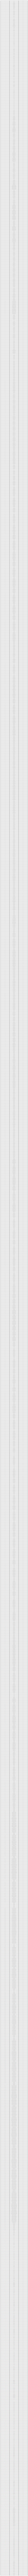

In [146]:
# 데이터프레임을 이미지로 시각화
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=emoji_love_dictionary.values, colLabels=emoji_love_dictionary.columns, loc='center', cellLoc='center')
plt.tight_layout()
plt.savefig('a.png', format='png')

plt.show()

In [147]:
#evaluation

test_data = double_deleted_emoji_data[["emoji", "emoji_name", "embedding_words"]].sample(n=20, random_state=23)
test_data

emoji                                         emoji_name  \
2188  👩🏼‍❤‍💋‍👨🏿  kiss: woman, man, medium-light skin tone, dark...   
1283      🧝🏼‍♀️                  woman elf: medium-light skin tone   
714          🧏🏻                       deaf person: light skin tone   
724       🧏🏿‍♂️                           deaf man: dark skin tone   
1920      🤽🏿‍♀️           woman playing water polo: dark skin tone   
1088       🤵🏾‍♂               man in tuxedo: medium-dark skin tone   
2572          🛑                                          stop sign   
1016         🥷🏽                            ninja: medium skin tone   
87            😡                                       enraged face   
2605          🎎                                     Japanese dolls   
2369   👩🏽‍❤️‍👨🏼  couple with heart: woman, man, medium skin ton...   
2689          📐                                   triangular ruler   
2130  🧑🏻‍❤‍💋‍🧑🏽  kiss: person, person, light skin tone, medium ...   
334       🫱🏻‍🫲🏼  handshake: light skin tone, medium-light skin ...   
2312  👩🏾‍❤‍💋‍👩🏿  kiss: woman, woman, medium-dark skin tone, dar...   
2148  🧑🏽‍❤‍💋‍🧑🏾  kiss: person, person, medium skin tone, medium...   
1108      👰🏼‍♂️              man with veil: medium-light skin tone   
599          🙅🏿                person gesturing NO: dark skin tone   
827        🧑🏼‍🏫                    teacher: medium-light skin tone   
747        🙇🏾‍♂                  man bowing: medium-dark skin tone   

                                        embedding_words  
2188  [[0.23076, 0.028758, -0.013179, -0.1123, 0.152...  
1283  [[-0.0056599, 0.48093, -0.14616, -0.10684, 0.1...  
714   [[1.4248, 0.36938, 0.18215, 0.12842, 0.29666, ...  
724   [[-0.56765, 0.15144, 0.08739, -0.58177, -0.364...  
1920  [[-0.24078, 0.024725, 0.64615, -0.39997, -0.35...  
1088  [[0.0060242, 0.14237, 0.26958, 0.27496, -0.130...  
2572  [[0.2425, -0.47787, -0.13228, -0.067827, 0.186...  
1016  [[0.1986, 0.28064, 0.29578, -0.27752, -0.05921...  
87    [[0.13273, -0.22757, 0.34666, -0.41695, -0.250...  
2605  [[-0.030552, 0.41459, 0.88288, 1.1641, -0.6000...  
2369  [[-0.56765, 0.15144, 0.08739, -0.58177, -0.364...  
2689  [[-1.4719, 0.79887, -0.36921, 1.1276, -0.51394...  
2130  [[0.23076, 0.028758, -0.013179, -0.1123, 0.152...  
334   [[-0.0056599, 0.48093, -0.14616, -0.10684, 0.1...  
2312  [[0.23076, 0.028758, -0.013179, -0.1123, 0.152...  
2148  [[0.23076, 0.028758, -0.013179, -0.1123, 0.152...  
1108  [[-0.15122, -0.22905, -0.026265, 0.064615, 0.4...  
599   [[0.50302, 0.079806, -0.0044601, 0.0085275, 0....  
827   [[0.44374, 0.67311, -0.51096, 0.20882, -0.1066...  
747   [[-0.56695, 0.113, 0.065717, -0.088285, -0.092...

In [149]:
y_actual = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
len(y_actual)

20

In [150]:
y_predict = test_data['embedding_words'].apply(calculate_love_score).tolist()
y_predict = [1 if score > 0.5 else 0 for score in y_predict]
y_predict

1/1 [==============================] - 0s 19ms/step


[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1]

In [151]:
correct_predict = sum(1 for a, p in zip(y_actual, y_predict) if a == p)
accuracy = correct_predict / len(y_predict) * 100
print('accuracy : {:.2f}%'.format(accuracy))

accuracy : 65.00%
